# Plot Beta distribution used in MixUp

In [1]:
from typing import List, Tuple
import numpy as np
from scipy.special import gamma

In [2]:
def beta_pdf_v1(x: List[float], alpha: float, beta: float) -> Tuple[List[float], List[float]]:
	new_x = [u for u in x if 0.0 < u < 1.0]
	new_y = [u ** (alpha - 1.0) * (1 - u) ** (beta - 1.0) for u in new_x]
	sum_ = sum(new_y)
	new_y = [v / sum_ for v in new_y]
	return new_x, new_y

def beta_pdf_v2(x: np.ndarray, alpha: float, beta: float) -> np.ndarray:
    y = (x ** (alpha - 1.0) * (1 - x) ** (beta - 1.0)) / (gamma(alpha) * gamma(beta) / gamma(alpha + beta))
    return y

### With matplotlib

In [3]:
from matplotlib import pyplot as plt

In [4]:
nb_points = 10000
x = [v / nb_points for v in range(1, nb_points+1)]

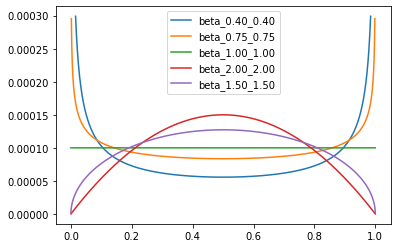

In [5]:
hparams = [
    (0.4, 0.4),
    (0.75, .75),
    (1.0, 1.0),
    (2.0, 2.0),
    (1.5, 1.5),
]
min_, max_ = 0, 0.0003

for alpha, beta in hparams:
    x, y = beta_pdf_v1(x, alpha, beta)
    # Filter values
    x_new, y_new = [], []
    for v1, v2 in zip(x, y):
        if min_ <= v2 <= max_:
            x_new.append(v1)
            y_new.append(v2)
    # Plot
    plt.plot(x_new, y_new, label="beta_{:.2f}_{:.2f}".format(alpha, beta))

# plt.yscale("log")
plt.legend()
plt.show()


### With Bokeh

In [165]:
import subprocess as sp

from bokeh.io.export import export_svg
from bokeh.models import Range1d, PrintfTickFormatter, Legend
from bokeh.palettes import all_palettes
from bokeh.plotting import figure, show, output_notebook

from selenium.webdriver import Firefox
output_notebook()

Loading BokehJS ...

In [107]:
nb_points = 1000
eps = 10e-5
step = 1.0 / nb_points
x = np.arange(eps, 1-eps, step=step)
x = np.concatenate((x, [1.0-eps]))
alphas = [0.99, 0.75, 0.50, 0.25, 0.01]

In [164]:
p = figure(
    frame_width=500,
    frame_height=500,
    title=r"",  # $$\text{Distributions } \text{Beta}(\alpha, \alpha)$$
    x_axis_label="x",
    y_axis_label="Densité de probabilité de Beta",
    y_axis_type="log",
)

palette = "Category10"
colors = all_palettes[palette][len(alphas)]

markers = ["square", "circle", "triangle", "diamond", "star"]
# markers = ["none"] * len(alphas)

for i, (alpha, color, mark) in enumerate(zip(alphas, colors, markers)):
    p.x_range = Range1d(0.0, 1.0)
    # p.y_range = Range1d(0.0, 0.003)
    # f"α α α ⍺ 𝛂 𝜶 𝝰 = {alpha}"
    legend_label = f"⍺ = {alpha}"

    y = beta_pdf_v2(x, alpha, alpha)
    y = y / sum(y)

    kwds = dict(x=x, y=y, legend_label=legend_label, color=color, line_width=2.0)
    every = 50
    kwds_mark = dict(x=x[::every], y=y[::every], legend_label=legend_label, color=color, size=8.0)

    p.line(**kwds)
    if mark == "square":
        p.square(**kwds_mark)
    elif mark == "circle":
        p.circle(**kwds_mark)
    elif mark == "cross":
        p.cross(**kwds_mark)
    elif mark == "diamond":
        p.diamond(**kwds_mark)
    elif mark == "annulus":
        p.annulus(**kwds_mark)
    elif mark == "ellipse":
        p.ellipse(**kwds_mark)
    elif mark == "star":
        p.star(**kwds_mark)
    elif mark == "triangle":
        p.triangle(**kwds_mark)
    else:
        print(f"Invalid value {mark=}")

p.yaxis[0].formatter = PrintfTickFormatter(format="%1.1e")

font_size = "18px"  # 16px 1.1em
glyph_size = 25

p.legend.glyph_width = glyph_size
p.legend.glyph_height = glyph_size
p.legend.label_text_font_size = font_size
p.legend.label_width = 1
p.legend.label_height = 1
p.axis.axis_label_text_font_size = font_size
p.axis.major_label_text_font_size = font_size

show(p)

p.output_backend = "svg"

driver = Firefox()
export_svg(p, filename="nb_data/beta_distributions.svg", webdriver=driver, width=500, height=500)
driver.close()

['nb_data/beta_distributions.svg']

In [166]:
# fname_noext = "nb_data/beta_distributions"
# target_format = "pdf"
# dpi = "90"
# _ = sp.check_call(f"rsvg-convert -f {target_format} -o {fname_noext}.{target_format} {fname_noext}.svg --dpi-x={dpi} --dpi-y={dpi}".split())

In [167]:
fname_noext = "nb_data/beta_distributions"
_ = sp.check_call(f"inkscape {fname_noext}.svg --export-pdf={fname_noext}.pdf".split())